In [61]:
from vertexai.preview.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image,
    Part,
)

import pandas as pd
import numpy as np

In [62]:
multimodal_model = GenerativeModel("gemini-pro-vision")

In [81]:
import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)

def convert_image_to_content(image_url: str) -> dict:
    image_bytes = get_image_bytes_from_url(image_url)
    image_bytes_io = io.BytesIO(image_bytes)
    
    # Convert the image to bytes and create a Content object
    content = {"image_bytes": image_bytes_io.getvalue()}
    
    return content



def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(" ", "%20")
    return url

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        elif isinstance(content, dict) and "image_bytes" in content:
            image = Image.open(io.BytesIO(content["image_bytes"]))
            display_images([image])
        else:
            print(content)

TypeError: Parameters to generic types must be types. Got <module 'PIL.Image' from '/opt/conda/lib/python3.10/site-packages/PIL/Image.py'>.

In [65]:
image_df = pd.read_csv("gs://hm-business-analytics-bucket/Embeddings_1/model_images.csv", sep= ";")

In [66]:
image_df= image_df[['article_id', 'url_still_medium', 'url_lookbook_medium']]

In [67]:
image_df

,article_id,url_still_medium,url_lookbook_medium
0,2690755,https://assets.hm.com/articles/1078982001?asse...,https://assets.hm.com/articles/1078982001?asse...
1,3171787,https://assets.hm.com/articles/0307239020?asse...,https://assets.hm.com/articles/0307239020?asse...
2,2777362,https://assets.hm.com/articles/1101656002?asse...,https://assets.hm.com/articles/1101656002?asse...
3,2702586,https://assets.hm.com/articles/0992720006?asse...,https://assets.hm.com/articles/0992720006?asse...
4,2562536,https://assets.hm.com/articles/0988242004?asse...,https://assets.hm.com/articles/0988242004?asse...
5,2389862,https://assets.hm.com/articles/0939880007?asse...,https://assets.hm.com/articles/0939880007?asse...
6,3100231,https://assets.hm.com/articles/1058346007?asse...,https://assets.hm.com/articles/1058346007?asse...
7,2569527,https://assets.hm.com/articles/1034707004?asse...,https://assets.hm.com/articles/1034707004?asse...
8,2478005,https://assets.hm.com/articles/0837249042?asse...,https://assets.hm.com/articles/0837249042?asse...
9,2793416,https://assets.hm.com/articles/1079685007?asse...,https://assets.hm.com/articles/1079685007?asse...


In [68]:
#url = "https://assets.hm.com/articles/0992720006?assetType=descriptiveStillLife&rendition=Medium&auth=9C79A3CE32"
#get_image_from_url(url)

In [69]:
#image_df['url_lookbook_medium'].apply(is_valid_image_url)

In [70]:
def is_valid_image_url(url):
    try:
        response = requests.head(url,  timeout=10)
        return response.status_code == 200 and response.headers['Content-Type'].startswith('image')
    except Exception as e:
        return False

In [71]:
#image_df['url_still_medium'].apply(is_valid_image_url)

In [72]:
import requests
from io import BytesIO
from PIL import Image

def get_image_from_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            # Check if the content is a valid image
            img = Image.open(BytesIO(response.content))
            return img
        else:
            return False
    except Exception as e:
        print(f"Error: {e}")
        return False

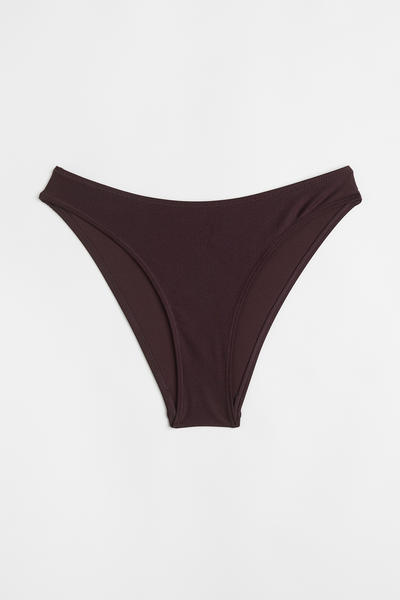

In [73]:
url = "https://assets.hm.com/articles/0992720006?assetType=descriptiveStillLife&rendition=Medium&auth=9C79A3CE32"
get_image_from_url(url)

In [74]:
valid_still_medium_urls = image_df['url_still_medium'].apply(is_valid_image_url)
valid_lookbook_medium_urls = image_df['url_lookbook_medium'].apply(is_valid_image_url)
filtered_image_df = image_df[valid_still_medium_urls & valid_lookbook_medium_urls]

In [75]:
filtered_image_df

,article_id,url_still_medium,url_lookbook_medium
1,3171787,https://assets.hm.com/articles/0307239020?asse...,https://assets.hm.com/articles/0307239020?asse...
4,2562536,https://assets.hm.com/articles/0988242004?asse...,https://assets.hm.com/articles/0988242004?asse...
5,2389862,https://assets.hm.com/articles/0939880007?asse...,https://assets.hm.com/articles/0939880007?asse...
6,3100231,https://assets.hm.com/articles/1058346007?asse...,https://assets.hm.com/articles/1058346007?asse...
8,2478005,https://assets.hm.com/articles/0837249042?asse...,https://assets.hm.com/articles/0837249042?asse...


In [76]:
filtered_image_df.columns

Index(['article_id', 'url_still_medium', 'url_lookbook_medium'], dtype='object')

In [77]:
image_paths_model = list(filtered_image_df.url_lookbook_medium)[:10]
image_paths_article = list(filtered_image_df.url_still_medium)[:10]
image_names = list(filtered_image_df.article_id)[:10]

In [78]:
image_paths_model

['https://assets.hm.com/articles/0307239020?assetType=lookbook&rendition=Medium&auth=7CD046EEA4',
 'https://assets.hm.com/articles/0988242004?assetType=lookbook&rendition=Medium&auth=81EB758399',
 'https://assets.hm.com/articles/0939880007?assetType=lookbook&rendition=Medium&auth=5FF700A73D',
 'https://assets.hm.com/articles/1058346007?assetType=lookbook&rendition=Medium&auth=7D5431368C',
 'https://assets.hm.com/articles/0837249042?assetType=lookbook&rendition=Medium&auth=312D718085']

In [79]:
url_model = image_paths_model[0]
url_article = image_paths_article[0]

In [80]:
img = load_image_from_url(url_model)
img

AttributeError: module 'PIL.Image' has no attribute 'from_bytes'

In [ ]:
img2 = get_image_from_url(url_article)
type(img2)

In [60]:
prompt1 = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: business unit, color, product type, product category, product subcategory garment group, graphical appereance, Pattern, Context, Season, Occasion, Fit, Shape, Garment_length, Shape, style platform, customer age group(such as adult, all ages, baby, kids, kids and young, newborn), Key Fiber Type such as cotton, linen, hemp, nylon, polyester, silk, wool etc. "
prompt2 = "And then look at the first image with the model picture and add an attribute of Yes/No whether model is looking at the camera. Also add whether the model is Smiling/ Not smiling. Add whether its Plain background/Environment. Also add if its Fullbody/Close Up image. Also add if its Balck&White/Color."
#prompt3 = "I want the following attributes as end result: business unit, color, product type, product category, product subcategory, garment group, graphical appereance, pattern, context, season,occasion, Fit, Shape, Garment_length, Season style platform, customer age group, Key Fiber Type, model_looking_at_camera, model_smiling,background, image_type, color_image." 
prompt4 = "All the fields should be populated and no key should have a none value."
prompt5 = "'business_unit','product_type', 'graphical_appereance','color','style_platform','customer_age_group','season','Context','model_smiling','background','image_type','color_image'"
prompt6 = "I want to have all the attributes list in prompt 5. Fix issues in the JSON"
prompt7 = "The Business unit could be one of the following: Ladies, men, Kids, Divided(these refer to clothes worn by teenagers), Lifestyle Brands or Unknown."
prompt8 = "the product type could be one of the following: Boots, Shirt, Sneakers, Towel, Socks, Earrings, Garment set - Upper body, Curtain, Table runner, Duvet cover set, Nailpolish, Lip make-up set, Bonnet hat, Hairband, Thermos, Lampshade, Garment Set - Full Body, Make-up brush, Knife, Unknown, Cape, Clutch, Pyjama top, Sleeping sack, Spoon, Pram suit, Headphones, Lip balm, False eyelashes, Gift"
prompt9 = "the garment group could be one of the following: Shoes, Accessories, Skirts, Unknown, Socks and Tights, Trousers Denim, External Items, Unknown P13 Garment Group, Blouses, Unknown P11 Garment Group, Knitwear, Dressed, Textile, Shirts, Woven/Jersey/Knitted mix Baby, Dresses Ladies, Cosmetic, Jersey Fancy, Special Offers , Unknown Singular Society Garment Group, Trousers, Under-, Nightwear, Outdoor, Swimwear, Hard Goods, H&M Home, Unknown It?s Pleat Garment Group, Jersey Basic, Dresses/Skirts girls, Unknown Micro Brands Garment Group, Furniture, Unknown Sellpy Garment Group, Unknown Business Ventures Garment Group, Unknown P12 Garment Group, Shorts, Lamps"
prompt10 = "the graphical appearance could be one of the following: Other pattern, Argyle, Dot, Other structure, Denim, Chambray, Unknown, Metallic, Jacquard, Lace, Mesh, Solid, Colour blocking, Transparent, Mixed solid/pattern, Melange, Application/3D, Embroidery, Slub, Hologram, Stripe, All over pattern, Contrast, Front print, Neps, Glittering/Metallic, Placement print, Treatment, Sequin, Check, Tie Dye"
prompt11= "the product category could be: Attachment, Outsole thickness, Closure placement, Hanging, Straw, Unknown, Fit, Shade, Socket, Scented, Silhouette, Light source included, Collar style, Style, Lining, Cover, Inside pouch, Table, Crown shape, Side details, Application area, Fringes, Waistband, Padding, Max rated wattage, Placement, Interchangeable ends, Sleeve length, Layer, UV protection, Shaft height, Removable padding, Maternity waist rise, Waistband solution, Container, Outsole type, Brim shape, Saucer, Cord, Ears, Removable straps, Bottom style, Seasonal transitional, Size, Support level, Scarf ending, Closure duvet cover, Hatband, Sections, Adjustable straps, Type of fixture, Wire, Underwear style, Designed for, Collapsible, Heel type, Construction, Garment length bottom, Back opening, Open back, Pom pom, Pocket, Blackout, Peak shape, String, Neckline style, Detail pillowcase, Bottom Coverage, Type of Application, Edge style, Shelves, Weels, Waist rise, Shaping level, Detail duvet cover, Shape, Toe shape, Room, Leg opening, Suitable for, Product size, Length, Handle, Type, Candle, Closure pillowcase, Occasion, Open toe, Anti-slip, Front closure, Closure, Material, Hook, Neck, Sock type, Detail, Waist, Hooded, Garment length, Straps, Type of closure, Edge, Form of Product, Coverage, Cups, Pet accessory style, Door, Lens"
prompt12= "the product subcategory could be: Summer, Hot pants, Ankle sock, Decorated, Towel, Wire bra, Weekend bag, Full length, Foot products, Molded padded, Tapered, Bow-tie, Hair spray, Card holder, 180x200, Oliver, Lip balm, Hair BB cream, Cape, Roll over, Cosmetic Glitter Glue, Office box, Poncho, Dog collar, Nailcare Base Coat, Sleep Bag, Fan, Weekly planner, Sewing Kit, Singel duvet cover set, Detergent Bag, Sack, Slacks, Hanging, Babydoll, Flat cap, Tube top, Messenger bag, Windbreaker, Laptop bag, Bath sheet, Strappy heeled sandals, Slip-on sneakers, Wallabee shoes, Mittens, Wine glass, Bralette top, Work boots, Snap, Dinner fork, Hand mirror, Fisherman sandals, Tailored shorts, Body suit, Moccasin, Running belt, Maxi, Peplum, Bootcut, Non bulky, Bulky, X-large, Full coverage, Calf height, Cemented, Wax, Pomade, Fibre brush, Regular Back, LED 6W, E12, Head, Flat, Fashion, Face, Sneakers, Straw, One candle, Band collar, Button-down collar, 25x35, Eyeshadow loose glitter, Tuxedo, Clay, Fake hair, Sock sneakers, Thermos, Rail, Unknown, Sleeveless, Low/flat heel, Face mask, Nail polish, Other gloves, Key ring, Colour correcting cream, Hair set, Knee-highs, Powder, Apron/bib, Paper weight, Press on nails, Hunter gloves, Dry shampoo, Conditioner, Hand soap, Sponge, Brooch, Shoe horn, Body cream, Toe step, Computer bag, Sun hat, Shoe decoration, Christmas sacks, Repair Patches, Contouring cream, Magnet, No specific style, Baseball cap, Onesie, Chino shorts, Body dress, Dinner jacket, Bralette, Strappy sandals, Mary Jane, Trilby, Hooded Blanket, Princess dress, Long trunks, Cropped, Regular fit, Skinny leg, Circular, Strings, Buckle, X-small, Light warm lining, Injected, Oil, Pen, High Neck, Shade, 5W, Low cut, Bulb, Five or more candles, Scented, Mule, Two candles, Front weels, Three levels, Plastic cord, Multi layers, No detail, V-neck, Cowl, 200x220 50x70, Sunglass chain, Puff pants, Six hooks, Wash cloth, Fitted, Steps/shaft less, Lip stick, Makeup bag, Single duvet cover set, Beret, Mixed, Triangle top, Creme blusher, Wrist warmers, Wide, Bowl, Body fragrances, Hair brush, Guest towle, Hand cream, Makeup brush, Lint roller, Cotton pads, Wash pads, Nail remover pump, Pull-on shorts, Hair pins, Footbed sandal, Loafer, Tumbler, Paperbag, Boater, Duffel Coat, Wash glove, Butter knife, Fisherman beanie, Dungaree dress, Corset top, Plastic spiral twisted, Espresso, Bowler, Square, Fit & flare, Text, Half circle, Knotted, Mid coverage, Balm, Low Back, Thin outsole, E27, No specific lens, Board game, 1 pom pom, Raw edge, Puzzle, Two doors, Jalousie, No details, Light padded, No waistband solution, Frilled collar, Resort collar, Bow collar, 200x220 60x63, Hair Paste, Bra tape, Record Book, Nursing squares, Deep plate, Super skinny leg, LED 1,8W, Dressed button, Strapless, Body shower, Soft bra, Mid heel, Ski gloves, Alice band, Wallet, Body lotion, Other mittens, Lipliner, Fake polo, Brush, Day cream, Treatments, Foldable, Christmas stockings, Straw hat, Stockings, Stationery, One lens, Hair curlers, Setting Spray, Scratch mittens, Pouch, Boxy T-shirt, Puffer waistcoat, Heavy sock, Bustier top, Baseball jacket, Jeggings, Throw on jacket, Neck warmer Bib, Bermuda shorts, Cardholder, Slip-on heeled sandals, Head scarf, Lamp table, Self-adhesive bra, Envelope, Shoe rack, Panama, Tennis Bracelet, Charm bracelet, Half-suit, Lamber jacket, Fake hair clip, Laptop sleeve, Dance shoe, Mid thigh, Rectangular, Cylinder, Bag, Knot, Adjustable Hook, Mid calf height, Gel, Ankle, Invisible, Thigh high, Push, None scented, One level, Eyes, No saucer, No specific shape, Boat neck, Crew-neck, 40x70, 200x200 50x80, 200x200 80x80, 60x70, Creme lipstick, Stain Remover Spray, Grandad shirt, Hourglass, Fast/not changeable, Deodorant, Toe, Hair Oil, Wrap/knot, Drawstring, Button, Bandeau top, Ready-knot, Cocktail, Magic gloves, Sun protector, Sarong, Halter neck, Decoration, Stay ups, Nail care, Items/novelty, Phone charger, Makeup sponge, Calotte, Hand lotion, Box, Cuba, Concealer applicator, Foundation liquid foundation, Loose Powder, Foundation compact foundation, Magic mittens, Travel containers, Book light, Laundry Bag, Rain hat, Overshirt, Shirt jacket, Chinos, Shell blouse, Double button, Belt, Set top/other, 90x200, Tie tanga, String, Beanie, Clutch/wrist, Eye brow fix, Stud, Cotton balls, Stickers, Cuff legs, Mirror, Fitted sheets, high waist, Pencil, Short top/bottom, Skinny, Hair mask, Compact powder, Helmet, Concealer, Handkerchiefs, Phone speaker, Shower oil, small, Eyebrow wax pen, Pencil case, Stud earrings, Runners, Sleeveless T-shirt, Tunic, Cuff bracelet, Hat rack, Track jacket, Flip flop, Utility waistcoat, Three quarter, Mid/Knee length, Slim fit, Ultra low waist, Asymmetric, Irregular, Bow, Elastic, Large, Throw, Ankle height, Folded edge, Cut edge, Solid, Lotion, Spray, No specific back, 40W, Dining room, Firm shape, High shape, Super push, No interchangeable ends, No collapsable, Pocket, Unfolded, Open back, Double fold up, Blackout, More than five pockets, Front, Unpadded, No collar, Funnel collar, MAMA, Lapel, Rib neck, Cut away collar, 50x50, 30x50, 60x60, Foot file metal, Selfie stick, Pom pom, Baby fork, Base layer set, Square pot holder, String bracelet, Stay-ups, Hidden buttons, Zip, Extra long sleeve, Pendant, Hair band, Baseball, Click clack, Brim big, Tank top/bottom, Gangster, Pillow cases, Foot file, Powder & rouge brush, Claw, Hair cream, Facial sponge, Manicure set, Cowboy, Nail file sandpaper, Lock, Puff, Eyelash glue, Eye primer, Sweatshirt, Puffer jacket, Court sneakers, Slip dress, Pencil skirt, Scarf, Sling-backs, Cape coat, Polo, Sweatshirt dress, Suit trousers, Face towel, Floor shelf, Tablespoon, Towel Cape, Capri trousers, Dinner plate, Gym bag, Loose fit, Relaxed fit, Elastic laces with velcro, Warm lining, Lined, Shaftless, Pressed powder, E14, Living room, Textile, Soft sole, No blackout, Seven hooks, Folded, Closed back, Shoe block, Wall cabinet, Dinner knife, Stamp, Mermaid dress, No scented, Five hooks, Winter, Fly, Button fly, Hook and eye, Open, 3/4 sleeve, Brief, Plain, Shopper, Molded push up, Eye shadow, Back pack, Slim, Straight, Roll tops, Flower, Eye brow powder, Visor, Eyeliner pen, Nail polish remover, Set top/top, Travel kit, Face primer, Beach shorts, Hair wax, Shoe sole, Ski mittens, Massager, Razor, Badges, Travel wallet, Paper tissues, Bath sheets, Powder brush, All over balm, Fiber wax, Chelsea boot, Tea towel, Track pants, LED candle, Fitted sheet, Tutu dress, Scented container, Coin purse, Tuxedo trousers, Pencil dress, Bikini set, Serving spoon, Car shoe, Cape jacket, Slipper boots, Mittens/fingerless, Tray table, Throw on cape, Short trunks, Skinny fit, Elastic strap, Press stud, Brazilian, Trunks/boxer, Thong, Extra cheeky, Tie back, Over knee height, Hidden waistband, Low support, Block heel, Stick, LED 8W, No anti-slip, G4, Shaftless/invisible, Nursery, Shape, Under bump, No cups, Interior design, Eyelets, Back and front, Easter, Face mask hooks, No specific neckline, Leggings with tulle skirt, Nose, Rolled edge, Two hooks, Cutaway collar, Bike seat cover, Transitional, Round neck, Other closure, Long sleeve, Hipster, Medium, Boxer, Chain, False nails, Oblong, Brazil, Bangle, Soft toy, Body mist, Set bottom/other, Straps, Foulard / bandana, Lip brush, Passport cover, Organizing kit, Eye makeup remover lotion, Wash bag, Cargo trousers, Denim shorts, Scrunchie, Trench Coat, T-shirt bra, Pillar candle, Filled container, 5-panel cap, T-light candle, Tuxedo shirt, Bangle bracelet, Cargo shorts, Fedora, Hand towel, Popover shirt, Parka coat, Standing cabinet, Boat shoe, Trekking boots, Pinafore, Biker, Oxford, Midi, A-line, Balloon, Arched, Pompoms, T-shaped, Pearls, Baby size, Cheeky, No specific waistband, Tassles edge, Three quarter length, Cream, No specific form, Chunky, LED 5W, No handle, Tall flowers, Waist, Embroidery, Decorative stiches, Kids room, Home office, Travel book, Card game, Cookbook, One hook, Shaded lens, Regular leg opening, Classic collar, No specific collar, Hooded, Button down collar, Asymmetric neck, Thin, Two pockets, Gift cord, All year around, Single button, Buttons double breasted, Adjustable waist, Short sleeve, Sleeve less, Other accessories, Regular sock, High heel, Set top/bottom, Half string, Trucker, Foot other accessories, Notebook, Pencil sharpener, Eyeliner fluid, Over knees, Double dovet cover set, Double bed spread, Bootie, Beside table, Anorak, Night slip, Drapery, Biker shorts, Beaded bracelet, Henley, Bath towel, Unitard, Western, Bolero, Satchel bag, Utility dress, Boardshorts, Low waist, Regular waist, Flags, Laces, No legs, Shortie, Standard lining, Hook & Eye, Kitten, Piping edge, Removable padding, Serum, LED 15W, Outdoor, E26, Piping, No specific room, Glass, Metal, Over bump, Hardcover, Clip on, Christmas, One pocket, Body, Lifestyle, Outdoor game, Curved peak, Roller neck, Square neck, Off shoulder, 30x60, 140x200 50x70, Dog leash, Shower cream, 50x70, Choke, Cross shoulder, Set bottom/bottom, Cleavage enhancer, Game, Infatable item, Pilot, Blusher, Feet, Sunglass case, Puff/strap legs, Liquid Lipstick, Beach towle, Blanket, Travel tag, Highlighter cream, Watch, Body wash, Beach skirt, Lip pencil, Garter, Trolley, Makeup brush cleansing spray, Tape, Eyeshadow pen, Joggers, Tapered candle, Shift dress, Plunge bra, Guest towel, Parka, Trucker jacket, Side table, Choker, Bump band, Hair string, Drop crotch, Towel Hood, Baseball T-shirt, Mid calf, Figurative, Slim leg, Hidden zip, Clasp, Single, Square toe, No heel, Liquid, Handle, Indoor and outdoor, Anti-slip, Overknee, No hatband, Hard sole, Loafers, Seasonless, Open toe, Three candles, Set of 2 tables, Full elastic band, Drawstring & Elastic, Stand collar, Rounded shirt collar, Heart shaped, V-neck shirt collar, V-neck band collar, Calculator, Pads, Knee length, High shaft, ankle length, Elastic band, Wrap, Waistband, Post cards, Creole, Skirt/brief, Terry band, Hair other accessories, Nail file, Foundation, Strap top/bottom, Body other accessories, Eye brush, Half length, Cleansing wipes, Makeup remover, Night cream, Eyebrow Pen, Highlighter powder, Frame less, Portfolio, Turban, Pedicure set, Wrapping paper, Shirt dress, Balconette bra, Skorts, Upholstered, Triangle bra, Bustier, Saddle bag, Cardigan vest, Utility shorts, Digital, Semi-circular, No lining, Low shaft, Lace waistband, Babylock seams, Plastic brush, LED 4W, Baby, Wing, Tassles, Textured, Mid bump, Paper, Legs, With sections, Glue on, Folded up, Four pockets, With UV protection, Non-integrated lighting, No bulb, Indoor, Peak lapel, Polo neck, Sailor neck, Shower towle, 240x220 50x60, 135x200 80x80, Foundation BB cream, Short, Long, Other, Dog clothing, Pins, Toiletry bag, Regular legs, N/A, Brim short, Suspender belt, Sewing item, Board shorts, Hair mousse, Halter neck top, Nailcare Top Coat, Eye lashes, Hair comb, Tweezers, Washing detergent, Jeans, Bodycon, Throw on dress, Crew sock, Rugby shirt, Tiered dress, Ear cuffs, Cocktail glass/coupe, Hobo bag, Throw on blazer, Cross strap sandals, String necklace, Pool sliders, Aviator jacket, Champagne flute, Top sheet, Gift tags, Baby spoon, Paper ribbon, D-ring, Adjustable straps, Pointed toe, Visible waistband, High support, Cone heel, Sculptured, Non removable padding, LED 2W, Small flowers, Hallway, Kitchen, Figurative container, One table, Hatband, Removable straps, Tie sides, Multible hooks, Ears, Paperback, Nail, Children's book, No pom pom, No ears, Non removable straps, Notch lapel, Big, Eyebrow powder, Shampoo, Snow suit, Eye makeup remover pads, Ankle shaft, Hidden button, Long/dangling, Bead, Sport socks, Push up top, Body massage glove, Anti slip sock, Eye brushes, Suspenders, Bandana, Cotton sticks, Sports bra, Plastic folders, Wet wipes, Eyelash curler, Racer back, Eyebrow kit, Mini steps, Glove, Lip pen, Surf, Body oil, Brush cleanser, Lip primer, Tank top, Wall shelf, Shell jacket, Beach towel, Hair clip, Miniature handbag, Fingerless gloves, Worker pants, Tankini, Bow barrette, Derby, Car Coat, Sock boots, Satin ribbon, Tennis Necklace, Round, Twisted, Buttons, Single zip, Front closure, Pull-on, Knee height, Thin heel, Wedge heel, No edge, Short leg, Mousse, No shade, Gold rim, Silver rim, Light shape, Medium shape, Closed toe, Mirror lens, Low leg opening, More than seven hooks, Flat peak, Indented, One door, Hair, Bow tie, Fabric covered cord, No UV protection, Wireless, Elastic insert, Shawl collar, Open collar, American neck, Hood, Turtle neck, Peter Pan collar, 40x40, Flapper dress, Integrated lighting, Ruler, Bike accessory, Single bed spread, Comb, Eye applicator, Toilet bag, Angel wing, Fragrance oil, Deo, Glove holders, Jewellry hanger, Face masks, Hoop earrings, Pendant earrings, Hair claw, Bomber jacket, Utility jacket, Wall hanging, Standing, Chain bracelet, Slipover, Harrington jacket, Monk strap shoes, Tutu skirt, Mount, Analogue, Candle ring, Mini, Lid, Toogle, Snapback, Pin stud, Velcro, Double, Bikini/Brief, Back closure, Medium support, Flared heel, Frill edge, Pump, Synthetic brush, Felt tip, Cross Back, GU10, Fringes, Inside pouch, Collapsable, Halloween, All, Tie, 2 pom poms, Eyebrows, No pocket, No sections, No fringes, High leg opening, Wired, Single layer, Pin, Shirt collar, One shoulder, Non hooded, 140x220 60x70, 50x90, 50x60, 50x80, Bike bell, Fisherman cap, Hand, Animal ears, 140x200 60x63, Regular, 3/4 length, Lace-up, None, Body other, Cup, Padded push up, Collar, 160x200, Purse, Party decoration, Ear flap, Cufflinks, Singlet/tank top, Old man, 140x200, Cleansing, Adjustable, Eye mask, Lip scrub, Curl cream, Wristbands, Dry hairspray, Powder puff, Eye makeup remover liquid, Hair primer, Lip peeling, Compact blusher, Camisole, No upholstered, Blazer dress, Racer jacket, Bandeau bra, Coffee, Utility shirt, Flat sheet, Treggings, Tube, Slipper loafer, Football sock, Combat boots, Pea Coat, Mid trunks, Muscle fit, Ultra high waist, Tulip, Braided, Mid shaft, Pom pom edge, Dropper, No specific applicator, Flatform, G9, Hip, Quilted, Knee high, No inside pouch, Bedroom, Rounded, With saucer, Folded down, Slouchy, Four hooks, No shape, No maternity waist rise, Not hooded, Mandarin collar, Deep plunge, 240x220 60x70, 80x80, Slip skirt, Jute ribbon, Air freshener, Standing and hanging, Velvet ribbon, Shorts, Buttons single breasted, Half zip, Trunks, Shoulder, Oversize, Lip gloss, Wire top, Padded, Mascara, Gift box, Eau de toilette, Phone shell, Body scrub, Eye make up remover, Cropped fingers, Nipple cover, Fisherman, Eyeshadow cream, Brush blusher, Salt water spray, Ragg socks, Gardening tool, Water bottle, Christmas tree carpet, Hair gel, Eyebrow cream, Edt, Compact bronzer, Highlighter pen, Brush foundation & powder, Resort shirt, Teaspoon, Finger gloves, Biker jacket, Character dress, Dungaree shorts, Puffer coat, Mule slippers, Trekking sandals, Bucket bag, Tea, Ear flap cap, Desert boots, Hair towel, Baguette bag, Duffel jacket, Baker boy, Starter plate, Extra long length, Flared, Oval, Cat eye, Magnetic, No closure, Semi bulky, Non adjustable straps, Round toe, Almond toe, Clasp/Fixed, Fringes edge, Vulcanized, Wand, Roll-on, All flowers, Bathroom, No container, Ceramic, Three hooks, No string, Two levels, Four candles, Memory, No straw, Art & photography, Birthday, Shawl lapel, Scoop neck, Other neck, Key hole, 150x200 50x60, 120x200, Cloth, T-bar shoes, Jodhpur boots, Bottle Opener, Yoga carpet, No adjustable straps"
prompt13 = "the context could be: Beach, Beach|Comfortably Casual, Beach|Homewear|Comfortably Casual|Party, Bride, Comfortably Casual, Comfortably Casual|Beach, Comfortably Casual|Beach|Homewear|School Uniform, Comfortably Casual|Costume party|Party, Comfortably Casual|Festival|Party|Homewear, Comfortably Casual|Hiking|Training|Cycling|Golf|Sport, Comfortably Casual|Homewear, Comfortably Casual|Homewear|Beach|Party, Comfortably Casual|Homewear|Beach|School Uniform, Comfortably Casual|Homewear|Nightwear, Comfortably Casual|Homewear|Party|Beach, Comfortably Casual|Nightwear, Comfortably Casual|Nightwear|Homewear, Comfortably Casual|Office, Comfortably Casual|Office|Well-dressed, Comfortably Casual|Office|Well-dressed|Party, Comfortably Casual|Party, Comfortably Casual|Party|Festival, Comfortably Casual|Running|Hiking|Sport|Training|Cycling, Comfortably Casual|Sport, Comfortably Casual|Well-dressed, Comfortably Casual|Well-dressed|Office, Comfortably Casual|Well-dressed|Office|Party, Comfortably Casual|Well-dressed|Party, Costume party, Costume party|Party|Comfortably Casual, Cycling|Dance|Sport, Cycling|Golf|Hiking|Sport|Training|Comfortably Casual|Skiing|Homewear|Running, Cycling|Golf|Homewear|Hiking|Running|Sport|Comfortably Casual|Training|Skiing, Cycling|Hiking|Comfortably Casual|Sport, Cycling|Hiking|Training|Sport|Comfortably Casual|Running, Cycling|Hiking|Training|Sport|Running, Cycling|Sport|Football|Hiking|Training|Golf, Cycling|Sport|Training|Golf|Hiking|Running, Cycling|Sport|Training|Skiing|Comfortably Casual|Running, Cycling|Training|Skiing|Hiking|Comfortably Casual|Sport, Cycling|Training|Skiing|Hiking|Sport|Comfortably Casual, Festival, Festival|Comfortably Casual|Party, Festival|Comfortably Casual|Party|Homewear, Festival|Party, Festival|Party|Comfortably Casual, Football|Running|Sport, Football|Sport, Golf|Cycling|Running|Hiking|Sport|Training, Golf|Hiking|Training|Skiing|Cycling|Sport, Golf|Skiing|Hiking|Sport|Training|Cycling, Hiking|Comfortably Casual|Running|Sport|Cycling|Golf|Training, Hiking|Comfortably Casual|Training|Sport|Cycling|Skiing, Hiking|Cycling|Running|Golf|Football|Training|Tennis|Skiing|Dance|Sport|Comfortably Casual, Hiking|Cycling|Training|Skiing|Running|Comfortably Casual|Sport, Hiking|Skiing|Sport, Hiking|Sport, Hiking|Sport|Comfortably Casual|Cycling|Training|Skiing, Hiking|Sport|Golf|Running|Training|Comfortably Casual|Cycling|Skiing|Football, Hiking|Sport|Skiing, Homewear, Homewear|Beach|Comfortably Casual|School Uniform, Homewear|Comfortably Casual, Homewear|Party|Beach|Comfortably Casual, Homewear|School Uniform|Beach|Comfortably Casual, Nightwear, Nightwear|Bride, Nightwear|Comfortably Casual|Homewear, Nightwear|Homewear, Nightwear|Homewear|Comfortably Casual, Office, Office|Comfortably Casual, Office|Comfortably Casual|Party, Office|Comfortably Casual|Well-dressed, Office|Homewear|Comfortably Casual|Well-dressed, Office|Party, Office|Party|Comfortably Casual|Well-dressed, Office|Party|Well-dressed, Office|School Uniform|Well-dressed, Office|Well-dressed, Office|Well-dressed|Comfortably Casual, Office|Well-dressed|Comfortably Casual|Homewear, Office|Well-dressed|Party, Office|Well-dressed|School Uniform, Party, Party|Comfortably Casual, Party|Comfortably Casual|Festival, Party|Comfortably Casual|Homewear|Festival, Party|Comfortably Casual|Well-dressed, Party|Comfortably Casual|Well-dressed|Office, Party|Festival, Party|Homewear|Comfortably Casual|Beach, Party|Office, Party|Office|Comfortably Casual|Well-dressed, Party|Office|Well-dressed, Party|Well-dressed, Party|Well-dressed|Comfortably Casual, Party|Well-dressed|Comfortably Casual|Office, Party|Well-dressed|Festival, Party|Well-dressed|Office, Party|Well-dressed|Office|Comfortably Casual, Running|Comfortably Casual|Cycling|Hiking|Skiing|Sport|Golf|Training|Homewear, Running|Comfortably Casual|Sport|Cycling|Training|Hiking, Running|Golf|Sport|Training|Hiking|Cycling, Running|Hiking|Comfortably Casual|Training|Cycling|Sport|Golf, Running|Skiing|Golf|Cycling|Hiking|Training|Sport, Running|Skiing|Training|Hiking|Sport, Running|Sport, Running|Sport|Hiking, Running|Sport|Training|Comfortably Casual|Skiing|Cycling, Running|Training|Comfortably Casual|Cycling|Golf|Sport|Hiking, Running|Training|Sport, School Uniform, School Uniform|Homewear|Comfortably Casual|Beach, School Uniform|Well-dressed, Skiing|Hiking|Sport, Skiing|Sport, Skiing|Sport|Hiking, Skiing|Training|Comfortably Casual|Running|Sport|Hiking|Golf|Cycling|Homewear, Sport, Sport|Comfortably Casual, Sport|Football, Sport|Golf|Cycling|Running|Comfortably Casual|Training|Hiking, Sport|Golf|Cycling|Skiing|Training|Hiking, Sport|Golf|Hiking|Running|Cycling|Homewear|Comfortably Casual|Skiing|Training, Sport|Golf|Training|Cycling|Hiking|Running, Sport|Hiking, Sport|Hiking|Golf|Cycling|Football|Training, Sport|Hiking|Skiing, Sport|Homewear, Sport|Running, Sport|Skiing, Sport|Skiing|Hiking, Sport|Training, Sport|Training|Running, Sport|Training|Tennis, Sport|Well-dressed|Dance|Party, Sport|Yoga, Sport|Yoga|Training, Tennis|Sport, Tennis|Sport|Padel, Tennis|Training|Sport, Training|Cycling|Sport|Running|Golf|Comfortably Casual|Hiking, Training|Golf|Cycling|Hiking|Football|Sport, Training|Hiking|Golf|Sport|Comfortably Casual|Running|Cycling, Training|Running|Sport, Training|Skiing|Hiking|Cycling|Running|Sport, Training|Sport, Training|Sport|Running, Well-dressed, Well-dressed|Comfortably Casual, Well-dressed|Comfortably Casual|Office, Well-dressed|Comfortably Casual|Office|Party, Well-dressed|Comfortably Casual|Party, Well-dressed|Comfortably Casual|Party|Office, Well-dressed|Office, Well-dressed|Office|Comfortably Casual, Well-dressed|Office|Comfortably Casual|Party, Well-dressed|Office|Party, Well-dressed|Office|School Uniform, Well-dressed|Party, Well-dressed|Party|Office, Well-dressed|School Uniform, Yoga|Sport, Yoga|Training|Sport"
prompt14 = "the Fit could be one of the following: loose fit, muscle fit, oversize, regular fit, relaxed fit, skinny fit, slim fit"
prompt15 = "garment length could be: Ankle length, Cropped, Extra long length, Full length, Knee length, Long, Long trunks, Maxi, Mid thigh, Mid trunks, Mid/Knee length, Midi, Mini, None, Regular, Short, Short trunks, Three quarter" 
prompt16 = "the occasion could be: Carnival, Carnival|Halloween|Prom|Easter|Singles' Day|Christmas|Valentine's Day, Christmas, Christmas|Diwali, Christmas|Halloween, Christmas|Halloween|New Year's Eve, Christmas|New Year's Eve, Christmas|New Year's Eve|Halloween, Christmas|New Year's Eve|Ramadan, Christmas|Ramadan, Christmas|Ramadan|New Year's Eve, Día de Muertos, Diwali, Easter|Halloween|Singles' Day|Prom|Christmas|Valentine's Day, Eid al-Fitr, Eid al-Fitr|Ramadan, Graduation, Graduation|Prom|New Year's Eve, Halloween, Halloween|Christmas, Lunar New Year, New Year's Eve, New Year's Eve|Christmas, New Year's Eve|Christmas|Halloween, New Year's Eve|Christmas|Ramadan, New Year's Eve|Graduation|Prom, New Year's Eve|Halloween|Christmas, New Year's Eve|Prom|Graduation, New Year's Eve|Ramadan, New Year's Eve|Ramadan|Christmas, Pride, Prom|Carnival|Singles' Day|Valentine's Day|Christmas|Halloween|Easter, Prom|Graduation|Easter, Ramadan, Ramadan|Christmas, Ramadan|Christmas|New Year's Eve, Ramadan|Eid al-Fitr, Ramadan|New Year's Eve, Ramadan|New Year's Eve|Christmas, Singles' Day|Prom|Christmas|Valentine's Day|Easter|Halloween, St. Lucia?s Day, St. Lucia?s Day|Christmas, Valentine's Day, Valentine's Day|Christmas, Valentine's Day|Singles' Day|Halloween|Prom|Easter|Carnival|Christmas" 
prompt17= "the style platform could be: HOME Baby cool, HOME Baby cute, HOME Baby Essential, HOME Casual, HOME Classic, HOME Clean, HOME Feminine, HOME Kids Cool, HOME Kids Essential, HOME Kids Sweet, HOME Not Applicable, HOME Relevant for all, Mens Athleisures, Mens Authentics, Mens Culturals, Mens Relevant for all, Mens S. Expressive, Mens S. Sober, Womens Casuals, Womens Confidents, Womens Relevant for all, Womens Romantics, Womens Sophisticates, Womens Street"
prompt18= "the shape could be one of the following: A-line, Asymmetric, Balloon, Bootcut, Bow, Braided, Cat eye, Circular, Cylinder, Figurative, Fit & flare, Flags, Flared, Half circle, Hourglass, Irregular, No specific shape, Oval, Pearls, Peplum, Plain, Pompoms, Rectangular, Round, Skinny leg, Slim leg, Square, Straight, Super skinny leg, Tapered, T-shaped, Tulip, Twisted, Wide" 
prompt19 = "The season could be one of the following: summer, winter, fall or spring season or a combination of these."
prompt3 = "I want the following attributes as end result in this particular order: business unit, color, product type, product category, product subcategory, garment group, graphical appereance, pattern, context, season,occasion, Fit, Shape, Garment_length, Season style platform, customer age group, Key Fiber Type, model_looking_at_camera, model_smiling,background, image_type, color_image." 
prompt20 = "Fix issues in JSON formatting so each key and its value appears on single line. This is very important and you will be penalized if you fail to do so."
prompt21 = "I see that some values appear on two lines which is not acceptable. Each value should appear on a single line without any breaks"

In [67]:
contents = [img, img2, prompt20, prompt1, prompt2,  prompt4, prompt5, prompt6, prompt7, prompt8, prompt9, prompt10, prompt11, prompt12, prompt13, prompt14, prompt15, prompt16, prompt17, prompt18, prompt19, prompt21, prompt3]

In [68]:
responses = multimodal_model.generate_content(contents, stream=True)

In [69]:
type(responses)

generator

In [70]:
json_output_full = []
for response in responses:
    json_output = response.text
    json_output_full.append(json_output)
    #parsed_json = json.loads(json_output)
    print(json_output)
    #print(type(json_output))
    #print(json_output)

TypeError: Unexpected item type: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x600 at 0x7F9E0A36BF70>.Only types that represent a single Content or a single Part are supported here.

In [ ]:
json_output_full

In [ ]:
data_dict = {}
for item in json_output_full:
    for match in re.findall(r'"(.*?)": "(.*?)"', item):
        data_dict[match[0]] = match[1]
        print(f"{match[0]}: {match[1]}")
        #data_dict[match[0]] = match[1]
        #print(f"{match[0]}: {match[1]}")

In [ ]:
re.sub(r'\n\s*', '', json_output_full)

In [ ]:
json_output_full

In [ ]:
#type(json_output_full)

In [ ]:
import re

In [ ]:
data_dict = {}
for item in json_output_full:
    for match in re.findall(r'"(.*?)": "(.*?)"', item, re.DOTALL):
        #a= re.sub(r'\n\s*', '', item)
        #print(a)
        data_dict[match[0]] = match[1]
        print(f"{match[0]}: {match[1]}")

In [ ]:
#data_dict

In [ ]:
df1 = filtered_image_df

In [ ]:
  prompt1 = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: business unit (The business unit could be one of the following categories:Ladies/Men/Kids/ Divided), color, product type, garment group, graphical appereance, pattern, style platform(womens casual, womens confidents, womens relevant for all, womens romantics, women sophisticates, womens street), customer age group(such as adult, all ages, baby, kids, kids and young, newborn), Key Fiber Type such as cotton, linen, hemp, nylon, polyester, silk, wool etc. Also have an attribute that tells whether the clothing item is for summer, winter, fall or spring season. And also add an attribute called 'Context' such as beach, bride, comfortably casual, costume party, party etc."
    prompt2 = "And then look at the first image with the model picture and add an attribute of Yes/No whether model is looking at the camera. Also add whether the model is Smiling/ Not smiling. Add whether its Plain background/Environment. Also add if its Fullbody/Close Up image. Also add if its Balck&White/Color."
    prompt3 = "I want the following attributes as end result: business_unit, product_type, garment_group, graphical_appereance, color, pattern,style_platform, customer_age_group, key_fiber_type, Context, season, model_looking_at_camera, model_smiling,background, image_type, color_image." 
    prompt4 = "All the fields should be populated and no key should have a none value."
    prompt5 = "'business_unit','product_type', 'graphical_appereance','color','style_platform','customer_age_group','season','Context','model_smiling','background','image_type','color_image'"
    prompt6 = "I want to have all the attributes list in prompt 5. Fix issues in the JSON"

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=pd.core.generic.SettingWithCopyWarning)
warnings.resetwarnings()

In [ ]:
df1.loc[:, 'business_unit'] = None
df1.loc[:, 'graphical_appereance'] = None
df1.loc[:, 'color'] = None
df1.loc[:, 'style_platform'] = None
df1.loc[:, 'customer_age_group']= None
df1.loc[:, 'season']= None
df1.loc[:, 'Context']= None
df1.loc[:, 'model_smiling']= None
df1.loc[:, 'background']= None
df1.loc[:, 'image_type']= None
df1.loc[:, 'color_image']= None
df1.loc[:, 'product type'] = None


for index, row in df1.iterrows():
    article_id =  row['article_id']
    url_model = row['url_lookbook_medium']
    url_article = row['url_still_medium']
    img_model = load_image_from_url(url_model)
    img_article = load_image_from_url(url_article)
    prompt1 = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: business unit (The business unit could be one of the following categories:Ladies/Men/Kids/ Divided), color, product type, garment group, graphical appereance, pattern, style platform(womens casual, womens confidents, womens relevant for all, womens romantics, women sophisticates, womens street), customer age group(such as adult, all ages, baby, kids, kids and young, newborn), Key Fiber Type such as cotton, linen, hemp, nylon, polyester, silk, wool etc. Also have an attribute that tells whether the clothing item is for summer, winter, fall or spring season. And also add an attribute called 'Context' such as beach, bride, comfortably casual, costume party, party etc."
    prompt2 = "And then look at the first image with the model picture and add an attribute of Yes/No whether model is looking at the camera. Also add whether the model is Smiling/ Not smiling. Add whether its Plain background/Environment. Also add if its Fullbody/Close Up image. Also add if its Balck&White/Color."
    prompt3 = "I want the following attributes as end result: business_unit, product_type, garment_group, graphical_appereance, color, pattern,style_platform, customer_age_group, key_fiber_type, Context, season, model_looking_at_camera, model_smiling,background, image_type, color_image." 
    prompt4 = "All the fields should be populated and no key should have a none value."
    prompt5 = "'business_unit','product_type', 'graphical_appereance','color','style_platform','customer_age_group','season','Context','model_smiling','background','image_type','color_image'"
    prompt6 = "I want to have all the attributes list in prompt 5. Fix issues in the JSON"
    contents = [img_model, img_article, prompt1, prompt2, prompt3, prompt4, prompt5, prompt6]
    
    responses = multimodal_model.generate_content(contents, stream=True)
    print(article_id)
    print("\n-------Response--------")
    json_output_full = []
    for response in responses:
        output_json = response.text
        json_output_full.append(output_json)
    #print(json_output_full)
    
    data_dict = {}
    for item in json_output_full:
        for match in re.findall(r'"(.*?)": "(.*?)"', item):
            data_dict[match[0]] = match[1]
            df2_dict = pd.DataFrame(data_dict, index=[0])

    df1.loc[index, 'business_unit'] = data_dict.get('business_unit', None)
    df1.loc[index, 'color'] = data_dict.get('color', None)
    df1.loc[index, 'graphical_appereance'] = data_dict.get('graphical_appereance', None)   
    df1.loc[index, 'style_platform'] = data_dict.get('style_platform', None)
    df1.loc[index, 'style_platform'] = data_dict.get('style_platform', None)
    df1.loc[index, 'customer_age_group'] = data_dict.get('customer_age_group', None)
    df1.loc[index, 'season'] = data_dict.get('season', None)
    df1.loc[index, 'Context'] = data_dict.get('Context', None)
    df1.loc[index, 'model_smiling'] = data_dict.get('model_smiling', None)
    df1.loc[index, 'background'] = data_dict.get('background', None)
    df1.loc[index, 'color_image'] = data_dict.get('color_image', None)
    df1.loc[index, ' image_type'] = data_dict.get('image_type', None)

In [ ]:
df1[['article_id', 'business_unit', 'style_platform', 'graphical_appereance', 'color']]

In [ ]:
df1

In [ ]:
#df1['color'] = None
for index, row in df1.iterrows():
    article_id =  row['article_id']
    url_model = row['url_lookbook_medium']
    url_article = row['url_still_medium']
    img_model = load_image_from_url(url_model)
    img_article = load_image_from_url(url_article)
    prompt1 = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: business unit (The business unit could be one of the following categories:Ladies/Men/Kids/ Divided), color, product type, garment group, graphical appereance, pattern, style platform(womens casual, womens confidents, womens relevant for all, womens romantics, women sophisticates, womens street), customer age group(such as adult, all ages, baby, kids, kids and young, newborn), Key Fiber Type such as cotton, linen, hemp, nylon, polyester, silk, wool etc. Also have an attribute that tells whether the clothing item is for summer, winter, fall or spring season. And also add an attribute called 'Context' such as beach, bride, comfortably casual, costume party, party etc."
    prompt2 = "And then look at the first image with the model picture and add an attribute of Yes/No whether model is looking at the camera. Also add whether the model is Smiling/ Not smiling. Add whether its Plain background/Environment. Also add if its Fullbody/Close Up image. Also add if its Balck&White/Color."
    prompt3 = "I want the following attributes as end result: business_unit, product_type, garment_group, graphical_appereance, color, pattern,style_platform, customer_age_group, key_fiber_type, Context, season, model_looking_at_camera, model_smiling,background, image_type, color_image." 
    prompt4 = "All the fields should be populated None should not be a response."
    prompt5 = "business_unit, product_type, graphical_appereance, color, style_platform, customer_age_group, season, Context, model_smiling, background, image_type, color_image"
    prompt6 = "I want to have all the attributes listed in prompt 5 in the output response"
    contents = [img_model, img_article, prompt1, prompt2, prompt3, prompt4, prompt5, prompt6]
    #contents = [img_model, img_article, prompt]
    responses = multimodal_model.generate_content(contents, stream=True)
    print(article_id)
    print("\n-------Response--------")
    json_output_full = []
    for response in responses:
        output_json = response.text
        #print(output_json)
        json_output_full.append(output_json)
    #print(json_output_full)
    
    data_dict = {}
    for item in json_output_full:
        for match in re.findall(r'"(.*?)": "(.*?)"', item):
            print(match[0])
            data_dict[match[0]] = match[1]
            df2_dict = pd.DataFrame(data_dict, index=[0])
            
    
    df1.at[index, 'business_unit'] = data_dict.get('business_unit', None)
    df1.at[index, 'product type'] = data_dict.get('product type', None)
    
    df1.at[index, 'color'] = data_dict.get('color', None)
    df1.at[index, 'graphical_appereance'] = data_dict.get('graphical_appereance', None)
    
    df1.at[index, 'style_platform'] = data_dict.get('style_platform', None)
    df1.at[index, 'customer_age_group'] = data_dict.get('customer_age_group', None)
    
    df1.at[index, 'season'] = data_dict.get('season', None)
    df1.at[index, 'Context'] = data_dict.get('Context', None)
    
    df1.at[index, 'model_smiling'] = data_dict.get('model_smiling', None)
    df1.at[index, 'background'] = data_dict.get('background', None)
    
    df1.at[index, 'color_image'] = data_dict.get('color_image', None)
    df1.at[index, ' image_type'] = data_dict.get('image_type', None)
    


In [ ]:
df1

In [ ]:
json_output_full

In [ ]:
df1

In [ ]:
df = pd.DataFrame(json_output_full)
df

In [ ]:
type(json_output_full)

In [ ]:
print("-------Prompt--------")
print_multimodal_prompt(contents)

In [ ]:
responses = []
for response in responses:
    response_dict = {}
    response_dict["text"] = response.text
    # Add other response attributes to the dictionary if needed

    responses.append(response_dict)

In [ ]:
responses

In [ ]:
print("\n-------Response--------")

output_json = {"responses": []}
for response in responses:
    output_json["responses"].append(json.dumps(response))

    

In [ ]:
df1 = image_df[4:6]

In [ ]:
df1

In [ ]:
import json

In [ ]:
df1

In [ ]:
field_names = ['color', 'product type']

In [ ]:
df1['color']= None
df1['product type'] = None 
for index, row in df1.iterrows():
    article_id =  row['article_id']
    url_model = row['url_lookbook_medium']
    url_article = row['url_still_medium']
    img_model = load_image_from_url(url_model)
    img_article = load_image_from_url(url_article)
    prompt = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: color, product type."
    contents = [img_model, img_article, prompt]
    responses = multimodal_model.generate_content(contents, stream=True)
    print(article_id)
    print("\n-------Response--------")
    json_output_full = []
    for response in responses:
        output_json = response.text
    json_output_full.append(output_json)
    #print(json_output_full)
    
    
    data_dict = {}
    for item in json_output_full:
        for match in re.findall(r'"(.*?)": "(.*?)"', item):
            data_dict[match[0]] = match[1]
            df2_dict = pd.DataFrame(data_dict, index=[0])

    df1.at[index, 'color'] = data_dict.get('color', None)
    df1.at[index, 'product type'] = data_dict.get('product type', None)


        

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

In [ ]:
json_output_full

In [ ]:
data_dict

In [ ]:
data_dict = {}
for item in json_output_full:
    print(item)
    print(1)
    for match in re.findall(r'"(.*?)": "(.*?)"', item):
        data_dict[match[0]] = match[1]
data_dict.update(data_dict)
       

        #print(data_df)
        #print(f"{match[0]}: {match[1]}")

In [ ]:
data_dict

In [ ]:
type(data_dict)

In [ ]:
data_dict

In [ ]:
 pd.DataFrame(data_dict, index=[0])

In [ ]:
for k, v in data_dict.items():
    print(k,v)

In [ ]:
cols = ['color', 'product ']

In [ ]:
pd.DataFrame(data_dict.items())

In [ ]:
pd.DataFrame([(k , v) for k, v in data_dict.items()], columns=[cols])

In [ ]:
df1['business_unit']= None
df1['graphical_appereance']= None
df1['color']= None
df1['style_platform']= None
df1['customer_age_group']= None
df1['season']= None
df1['Context']= None
df1['model_smiling']= None
df1['background']= None
df1['image_type']= None
df1['color_image']= None
df1['product type'] = None


for index, row in df1.iterrows():
    article_id =  row['article_id']
    url_model = row['url_lookbook_medium']
    url_article = row['url_still_medium']
    img_model = load_image_from_url(url_model)
    img_article = load_image_from_url(url_article)
    #prompt = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: color, product type."
    #contents = [img_model, img_article, prompt]
    prompt1 = "There are two images: one that has a model wearing clothes and one that only has a clothing item. Focus on the second image initially that has only clothing item and extract its following attributes in JSON format: business unit (The business unit could be one of the following categories:Ladies/Men/Kids/ Divided), color, product type, garment group, graphical appereance, pattern, style platform(womens casual, womens confidents, womens relevant for all, womens romantics, women sophisticates, womens street), customer age group(such as adult, all ages, baby, kids, kids and young, newborn), Key Fiber Type such as cotton, linen, hemp, nylon, polyester, silk, wool etc. Also have an attribute that tells whether the clothing item is for summer, winter, fall or spring season. And also add an attribute called 'Context' such as beach, bride, comfortably casual, costume party, party etc."
    prompt2 = "And then look at the first image with the model picture and add an attribute of Yes/No whether model is looking at the camera. Also add whether the model is Smiling/ Not smiling. Add whether its Plain background/Environment. Also add if its Fullbody/Close Up image. Also add if its Balck&White/Color."
    prompt3 = "I want the following attributes as end result: business_unit, product_type, garment_group, graphical_appereance, color, pattern,style_platform, customer_age_group, key_fiber_type, Context, season, model_looking_at_camera, model_smiling,background, image_type, color_image." 
    prompt4 = "All the fields should be populated and no key should have a none value."
    prompt5 = "'business_unit','product_type', 'graphical_appereance','color','style_platform','customer_age_group','season','Context','model_smiling','background','image_type','color_image'"
    prompt6 = "I want to have all the attributes list in prompt 5"
    contents = [img_model, img_article, prompt1, prompt2, prompt3, prompt4, prompt5, prompt6]
    
    responses = multimodal_model.generate_content(contents, stream=True)
    print(article_id)
    print("\n-------Response--------")
    json_output_full = []
    for response in responses:
        output_json = response.text
    json_output_full.append(output_json)
    #print(json_output_full)
    
    
    data_dict = {}
    for item in json_output_full:
        for match in re.findall(r'"(.*?)": "(.*?)"', item):
            data_dict[match[0]] = match[1]
            df2_dict = pd.DataFrame(data_dict, index=[0])

    df1.at[index, 'business_unit'] = data_dict.get('business_unit', None)
    df1.at[index, 'product type'] = data_dict.get('product type', None)
    
    df1.at[index, 'color'] = data_dict.get('color', None)
    df1.at[index, 'graphical_appereance'] = data_dict.get('graphical_appereance', None)
    
    df1.at[index, 'style_platform'] = data_dict.get('style_platform', None)
    df1.at[index, 'customer_age_group'] = data_dict.get('customer_age_group', None)
    
    df1.at[index, 'season'] = data_dict.get('season', None)
    df1.at[index, 'Context'] = data_dict.get('Context', None)
    
    df1.at[index, 'model_smiling'] = data_dict.get('model_smiling', None)
    df1.at[index, 'background'] = data_dict.get('background', None)
    
    df1.at[index, 'color_image'] = data_dict.get('color_image', None)
    df1.at[index, ' image_type'] = data_dict.get('image_type', None)